In [155]:
from blimpy import Waterfall
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splev, splrep

# data = Waterfall('../../../../../../../mnt_blpd7/datax/dl/GBT_57541_61313_HIP12549_fine.h5', load_data= False ).info()
f_start , f_stop =1023.9257812499999, 1926.26953125
# f_start, f_stop= 1023.9257812499999, 1080.322265625

data = Waterfall('../../../../../../../mnt_blpd7/datax/dl/GBT_57541_61313_HIP12549_fine.h5', f_start,f_stop ).data
y = np.sum(data[:,0,:], axis=0)
res = (f_stop-f_start)/y.shape[0]
print(y.shape)
x = np.arange(y.shape[0])
print(x.shape)
print(res)

(318230528,)
(318230528,)
2.835503418452676e-06


In [171]:
spl_order=64
knots = np.arange(0, x.shape[0], x.shape[0]//spl_order+1)
spl = interpolate.splrep(x, y, t=knots[1:])
chan_fit = interpolate.splev(x, spl)
print(chan_fit.shape)

(318230528,)


In [170]:
spl_order=
knots = np.arange(0, x.shape[0], x.shape[0]//spl_order+1)
spl = interpolate.splrep(x, y, t=knots[1:])
chan_fit = interpolate.splev(x, spl)
print(chan_fit.shape)

3


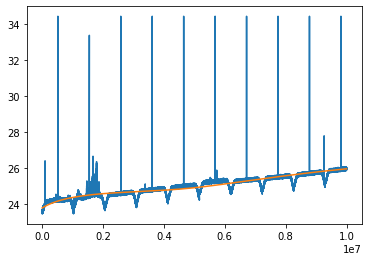

In [173]:
%matplotlib inline
plt.plot(x[:int(1e7)], np.log(y[:int(1e7)]), x[:int(1e7)], np.log(abs(chan_fit[:int(1e7)])))
plt.show()

In [158]:
candidate = []
for k in range(y.shape[0]//256):
    real = np.mean(y[k*256:(k+1)*256])
    expec = np.mean(chan_fit[k*256:(k+1)*256])
    if real/expec >1.05:
        candidate.append(k)        
        
print(len(candidate))
print(y.shape[0]//256)
print(len(candidate)/(y.shape[0]//256))

417250
1243088
0.3356560436590169


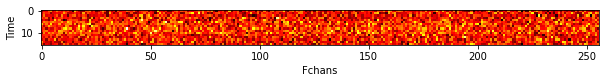

11904595000.0
8310485000.0


In [149]:
%matplotlib inline
from random import random
index = candidate[int(random()*len(candidate))]
plt.figure(figsize=(10,4))
plt.xlabel("Fchans")
plt.ylabel("Time")
plt.imshow(data[:,0,index*256:(index+1)*256], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()
print(data[:,0,index*256:(index+1)*256].max())
print(np.mean(data[:,0,index*256:(index+1)*256]))

(1033216,)


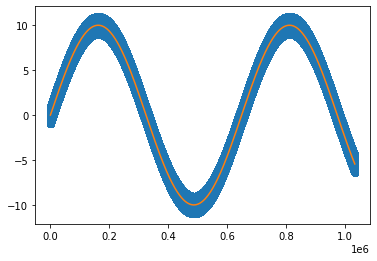

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splev, splrep

channel_width=1033216
spl_order=16
x = np.arange(channel_width)
integrated_channel = np.sin(x)+10*np.sin(x/103321)
knots = np.arange(0, channel_width, channel_width//spl_order+1)
spl = interpolate.splrep(x, integrated_channel, t=knots[1:])
chan_fit = interpolate.splev(x, spl)
print(chan_fit.shape)

%matplotlib inline
plt.plot(x, integrated_channel, 'o', x, chan_fit)
plt.show()

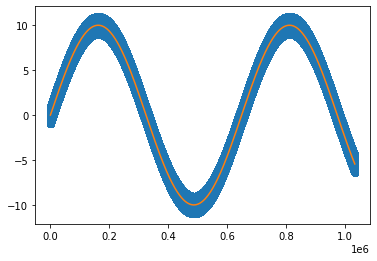